<a href="https://colab.research.google.com/github/darshan12345678910/Air-quality-prediction-ml-algorithms/blob/main/forward_pass_neural_netwrok_from_strach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [27]:
mnist=tf.keras.datasets.mnist
(train_img,train_label),(test_img,test_label)=mnist.load_data()

In [37]:
X=train_img
y=train_label
print(type(X))
print(X.shape,y.shape)

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,)


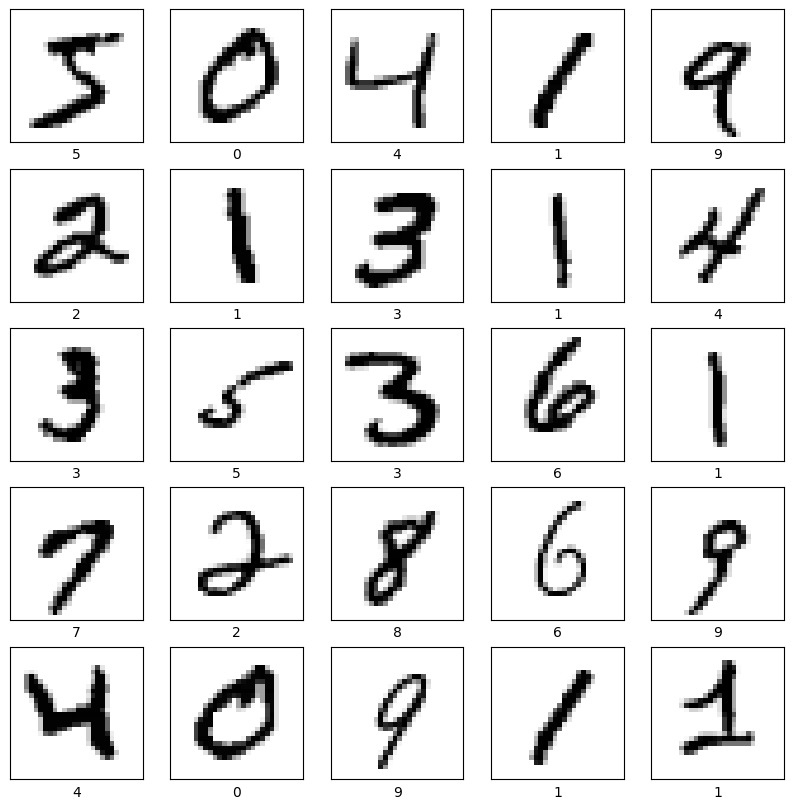

In [36]:
def Custom_plot(X):
  plt.figure(figsize=(10,10))
  for i in range(X):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i],cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
    plt.grid(False)
  plt.show()
Custom_plot(25)

In [46]:
X = X.reshape(X.shape[0], -1)

In [92]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),    #specify input size
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "my_model"
)

In [53]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,095 (234.75 KB)

 Trainable params: 20,031 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,064 (156.50 KB)

In [93]:
[layer1, layer2, layer3] = model.layers

In [94]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [50]:
prediction = model.predict(X[0].reshape(1,784))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,784))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
 predicting a zero: [[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 predicting a one:  [[1.]]


In [90]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(train_img, train_label), (test_img, test_label) = mnist.load_data()

# Print shape of the data
print(f"Train images shape: {train_img.shape}, Train labels shape: {train_label.shape}")
print(f"Test images shape: {test_img.shape}, Test labels shape: {test_label.shape}")

# Preprocess the data
# Normalize images to range [0, 1]
X_train = train_img / 255.0
X_test = test_img / 255.0

# Flatten labels for one-hot encoding
y_train = to_categorical(train_label, num_classes=10)
y_test = to_categorical(test_label, num_classes=10)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D vectors of size 784
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=5,  # number of epochs
                    batch_size=32,  # batch size
                    verbose=1)  # Display training progress

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Save the model
model.save("mnist_simple_nn.h5")
print("Model saved as mnist_simple_nn.h5")


Train images shape: (60000, 28, 28), Train labels shape: (60000,)
Test images shape: (10000, 28, 28), Test labels shape: (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 - 12s - 8ms/step - accuracy: 0.9232 - loss: 0.2650 - val_accuracy: 0.9549 - val_loss: 0.1460
Epoch 2/5
1500/1500 - 6s - 4ms/step - accuracy: 0.9653 - loss: 0.1144 - val_accuracy: 0.9660 - val_loss: 0.1126
Epoch 3/5
1500/1500 - 7s - 5ms/step - accuracy: 0.9755 - loss: 0.0790 - val_accuracy: 0.9712 - val_loss: 0.0961
Epoch 4/5
1500/1500 - 8s - 6ms/step - accuracy: 0.9814 - loss: 0.0584 - val_accuracy: 0.9743 - val_loss: 0.0896
Epoch 5/5
1500/1500 - 7s - 5ms/step - accuracy: 0.9840 - loss: 0.0479 - val_accuracy: 0.9718 - val_loss: 0.0910


Test Loss: 0.0797, Test Accuracy: 0.9752
Model saved as mnist_simple_nn.h5


In [60]:
X_train.shape

(48000, 28, 28)

In [64]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def test_model(model_path, input_image):
    """
    Testing the trained model with a single input image.

    Parameters:
        model_path (str): Path to the trained model file (.h5).
        input_image (numpy.ndarray): A single 28x28 grayscale image as input.

    Returns:
        int: Predicted digit.
    """
    # Load the trained model
    model = load_model(model_path)

    # Check if the input image has the correct dimensions
    if input_image.shape != (28, 28):
        raise ValueError("Input image must have shape (28, 28).")

    # Preprocess the input image
    input_image = input_image / 255.0  # Normalize to [0, 1]
    input_image = input_image.reshape(1, 28, 28)  # Add batch dimension

    # Predict the digit
    predictions = model.predict(input_image, verbose=0)
    predicted_digit = np.argmax(predictions)  # Get the digit with the highest probability

    # Plot the image and display the result
    plt.imshow(input_image.squeeze(), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

    return predicted_digit


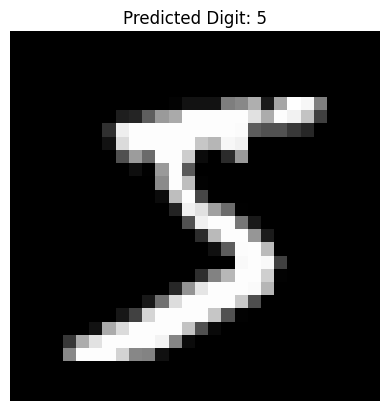

5

In [65]:
model1="/content/mnist_simple_nn.h5"
image=train_img[0]
test_model(model1,image)

In [80]:
[layer1, layer2, layer3,layer4] = model.layers



In [81]:
for layer in model.layers:
  weights = layer.get_weights()
  if len(weights) == 2:  # Ensure weights and biases are present
      W1, b1 = weights
      print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
  else:
      print(f"Layer {layer1.name} has no weights or biases.")


Layer flatten_1 has no weights or biases.
W1 shape = (784, 128), b1 shape = (128,)
W1 shape = (128, 64), b1 shape = (64,)
W1 shape = (64, 10), b1 shape = (10,)


#Building and training a basic fully connected neural network for MNIST classification.
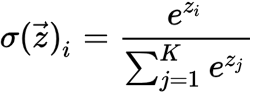


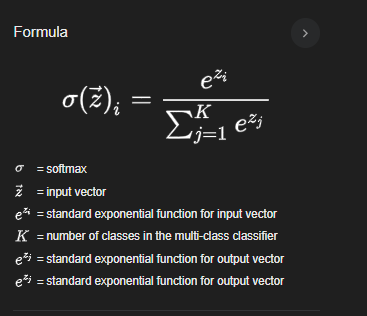

In [95]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Softmax function
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = -np.log(y_pred[range(n_samples), y_true])
    return np.sum(logp) / n_samples

# One-hot encoding
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((labels.shape[0], num_classes))
    one_hot[np.arange(labels.shape[0]), labels] = 1
    return one_hot

# Neural network class
class CustomNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y_true, y_pred, learning_rate):
        # Backward pass
        n_samples = X.shape[0]
        y_true_one_hot = one_hot_encode(y_true, y_pred.shape[1])

        dZ2 = y_pred - y_true_one_hot
        dW2 = np.dot(self.A1.T, dZ2) / n_samples
        db2 = np.sum(dZ2, axis=0, keepdims=True) / n_samples

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / n_samples
        db1 = np.sum(dZ1, axis=0, keepdims=True) / n_samples

        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            # Compute loss
            loss = cross_entropy_loss(y, y_pred)
            # Backward pass
            self.backward(X, y, y_pred, learning_rate)
            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        # Predict classes
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

# Load and preprocess the MNIST dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the images and normalize
train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

# Define model parameters
input_size = 784  # 28x28 flattened
hidden_size = 64
output_size = 10
epochs = 1000
learning_rate = 0.1

# Create and train the neural network
model = CustomNeuralNetwork(input_size, hidden_size, output_size)
model.train(train_images[:10000], train_labels[:10000], epochs, learning_rate)  # Use a subset for faster training

# Evaluate the model on test data
predictions = model.predict(test_images[:1000])
accuracy = np.mean(predictions == test_labels[:1000])
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 100/1000, Loss: 2.2797
Epoch 200/1000, Loss: 2.1187
Epoch 300/1000, Loss: 1.6385
Epoch 400/1000, Loss: 1.2001
Epoch 500/1000, Loss: 0.9394
Epoch 600/1000, Loss: 0.7757
Epoch 700/1000, Loss: 0.6664
Epoch 800/1000, Loss: 0.5899
Epoch 900/1000, Loss: 0.5338
Epoch 1000/1000, Loss: 0.4910
Test Accuracy: 85.60%


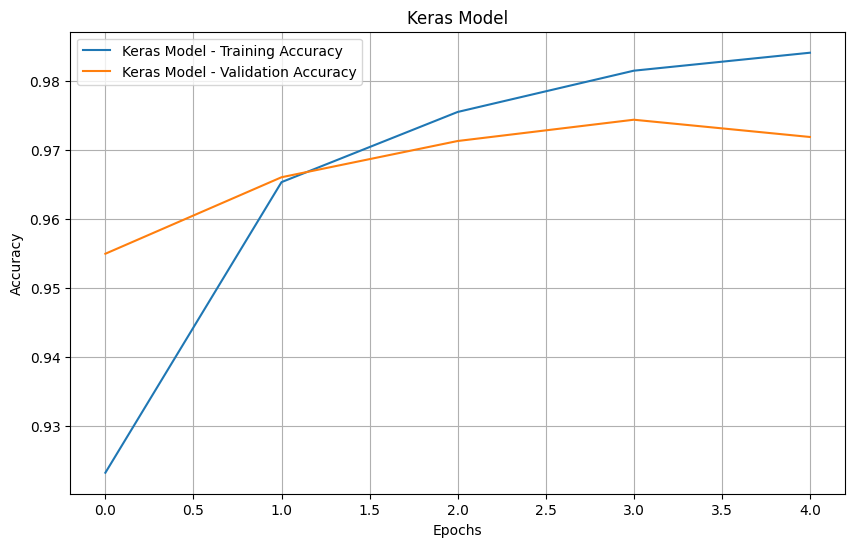

In [91]:
# Plot the comparison of accuracy
plt.figure(figsize=(10, 6))

# Keras Model Accuracy
plt.plot(history.history['accuracy'], label='Keras Model - Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Keras Model - Validation Accuracy')
# Labeling
plt.title('Keras Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

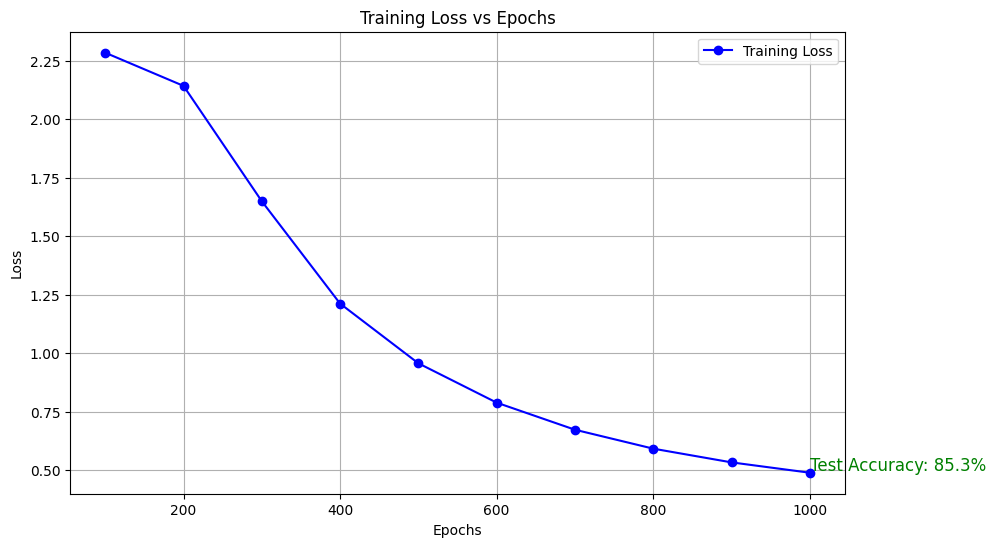

In [89]:
import matplotlib.pyplot as plt

# Data (Epoch vs Loss)
epochs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
loss = [2.2834, 2.1417, 1.6487, 1.2115, 0.9564, 0.7884, 0.6727, 0.5918, 0.5332, 0.4890]
test_accuracy = 85.30  # Test accuracy after training

# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='b', marker='o')

# Add labels and title
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

# Display Test Accuracy
plt.text(1000, 0.5, f'Test Accuracy: {test_accuracy}%', color='green', fontsize=12)

# Show the plot
plt.legend()
plt.show()
